# Millenials and Investment: an Ongoing Exploration

In case you haven't heard, [millenials are killing everything](http://www.businessinsider.com/millennials-are-killing-list-2017-8/#diamonds-12) from diamonds to department stores to designer crap to grocery chains.

Why? Sure, the recession had an impact. But also, millenials pay more attention to ethics than many multinational corporations bargain for. They cite the blood diamond trade as a major reason to spring for non-traditional engagement rings. They opt for grocery providers that can tell them where their food is coming from and under what conditions it was produced. They're ditching the fast fashion industry for higher-priced items purchased secondhand on sites like Poshmark and ThreadUp. 

And as millenials reach the age where they might accrue some savings, it makes sense that they would care about where that is going, too. In addition to millenial attendance at the NoDAPL protests, we saw thousands of millenials divest from Western Union, Bank of America, and other banks that loaned money to the project. Maybe megacorps won't change their tunes because a few thousand people stood in a field to get mowed down by water cannons, but they're more likely to sit up and listen when those same people take their hard-earned doll hairs to another playhouse.

So we see that millenials are surveying their options to spend and save according to their values. What about investing? Any personal finance 101 that isn't taught by a financial advisor will recommend a low cost index as the place to stick extra money so it can grow with the market. Most index funds, including the most recommended one (Vanguard), decide their investments via index-matching: matching their holdings to the S&P500 by market cap, with no other variables. Thing is, plenty of investors are expressing interest in taking ethical considerations into account. Some portfolios do this by blanket blocking investments in certain industries like tobacco or porn. Other more advanced optsions, like Betterment's AutoSRI portfolio, use actual ESG data to determine where they invest the money. There isn't (yet) a fully customizable option to allow folks to automatically invest their funds based on a checklist of their individual values. For a while, I've thought about building a toy version of what that might look like. 

When I talk about the idea with friends and relatives, I get the following objection: 'What about the returns?' Touche. Nobody wants to lose out on their potential earnings. At first, I figured I'd build a tolerance into the system that allowed investors to say 'These are my values, but please don't invest in a way that will trail general market performance by more than x percent.' The algorithm would then predict stock performance for each company, somehow blend that with ESG rating, and come up with a combined weight for divvying up investment money.

Before I build that, though, I need to test the assumption that high ESG ratings *do* correlate negatively with returns. If they don't, there's no need for the tolerance measure in the first place.

I'm not the first person to run correlations along these lines. Dorfleitner, Utz, and Wimmer published a paper on this just last year. [Their analysis](http://www.tandfonline.com/doi/full/10.1080/20430795.2017.1403272?scroll=top&needAccess=true) suggests that higher corporate social responsibility ratings *increase* returns over a long period of time ("long" being a 12 year period from 2002-2014). They even identify three specific areas that correlate with higher than average returns: emission and resource reduction, workforce, and society. So in my exploration, I'll dig into some specific CSR breakdowns with the data I have on S&P 500 companies. 

In [1]:
import pandas as pd

## Correlating KLD ESG Ratings to Stock Performance, 1990-2005

Let's determine whether we notice any correlation between companies' environmental, social, and governmental ratings and their stock performance. 

### First, we pull in the ESG data. 

These come from KLD and are now distributed by MSGI. I pulled them from an academic database. Don't rerun this notebook because I didn't push the actual data to Github. 

In [2]:
y91 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1991 HistoricalSpreadsheet_STATS.xls')
y92 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1992 HistoricalSpreadsheet_STATS.xls')
y93 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1993 HistoricalSpreadsheet_STATS.xls')
y94 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1994 HistoricalSpreadsheet_STATS.xls')
y95 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1995 HistoricalSpreadsheet_STATS.xls')
y96 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1996 HistoricalSpreadsheet_STATS.xls')
y97 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1997 HistoricalSpreadsheet_STATS.xls')
y98 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1998 HistoricalSpreadsheet_STATS.xls')
y99 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1999 HistoricalSpreadsheet_STATS.xls')

nineties = [y91, y92, y93, y94, y95, y96, y97, y98, y99]

In [3]:
y00 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2000 HistoricalSpreadsheet_STATS.xls')
y01 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2001 HistoricalSpreadsheet_STATS.xls')
y02 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2002 HistoricalSpreadsheet_STATS.xls')
y03 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2003 HistoricalSpreadsheet_STATS.xls')
y04 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2004 HistoricalSpreadsheet_STATS.xls')
y05 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2005 Historical Spreadsheet_STATS.xls') #wth KLD
y06 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2006 Historical Spreadsheet_STATS.xls')
y07 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2007 HistoricalSpreadsheet_STATS.xls')
y08 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2008 HistoricalSpreadsheet_STATS.xls')
y09 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2009 HistoricalSpreadsheet_STATS.xls')


two_thousands = [y00, y01, y02, y03, y04]

I wanted to run 1990-2009, but evidently starting in 2005 these spreadsheets no longer represent whether a company was in the S&P500 in the same way. That's okay: we can do this for a fifteen-year period wrangle in more data later if we would like to see a longer period of time.

Now let's pull out the companiess that belong to the S&P 500. We'll begin by examining their ESG scores on four metrics: employment policy strengths, employment policy concerns, environmental impact strengths, and environmental impact concerns. These companies get a score of zero (0) or one (1) each year on each of several sub-metrics. For example, employment policy strengths include specific scores for workplace safety, compensation, union management, et cetera. 

We're going to sum up all of the sub-metrics for each metric per company, and then we're going to sum that company's total scores in that metric across our fifteen year time span. We'll end up with a company score of cumulative strengths and concerns in employment and environmental practices over the course of the fifteen years. 

In [4]:
twenty_years = nineties + two_thousands

def filter_500(df):
    return df[df['SP500'] == True]

sp500_90s = []    
for data in twenty_years:
  sp500_90s.append(filter_500(data))

aggregate_data = pd.concat(sp500_90s)
aggregate_data['EMP-str-sum'] = aggregate_data[['EMP-str-A','EMP-str-B','EMP-str-C','EMP-str-D','EMP-str-F','EMP-str-G']].sum(axis=1)
aggregate_data['EMP-con-sum'] = aggregate_data[['EMP-con-A','EMP-con-B','EMP-con-C','EMP-con-D']].sum(axis=1)
aggregate_data['ENV-str-sum'] = aggregate_data[['ENV-str-A','ENV-str-B','ENV-str-C','ENV-str-D','ENV-str-F','ENV-str-G']].sum(axis=1)
aggregate_data['ENV-con-sum'] = aggregate_data[['ENV-con-A','ENV-con-B','ENV-con-C','ENV-con-D','ENV-con-E','ENV-con-F']].sum(axis=1)
aggregate_data.head()

,ALC-con-#,ALC-con-A,ALC-con-X,BMS,CGOV-con-#,CGOV-con-B,CGOV-con-F,CGOV-con-G,CGOV-con-H,CGOV-con-I,...,Russell2000,SP500,TOB-con-#,TOB-con-A,TOB-con-X,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum
0,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,ABT,0,0,0,1
1,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,AMT,0,0,0,0
3,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,AMD,1,0,0,1
4,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,AET,1,0,0,0
6,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,AHM,0,0,0,0


In [5]:
def sum_scores_for(dataframe, esg_marker):
    grouping = dataframe.groupby(['Ticker'])[esg_marker].sum()
    return pd.DataFrame({esg_marker : grouping}).reset_index()

In [6]:
esg_marker_data = sum_scores_for(aggregate_data, 'EMP-str-sum')
esg_marker_data.head()

,Ticker,EMP-str-sum
0,A,6
1,AA,19
2,AAL,1
3,AAPL,7
4,ABC,0


Ah, these sums look like what we would expect to see!

In [7]:
esg_marker_data['EMP-con-sum'] = sum_scores_for(aggregate_data, 'EMP-con-sum')['EMP-con-sum']
esg_marker_data['ENV-str-sum'] = sum_scores_for(aggregate_data, 'ENV-str-sum')['ENV-str-sum']
esg_marker_data['ENV-con-sum'] = sum_scores_for(aggregate_data, 'ENV-con-sum')['ENV-con-sum']

In [8]:
esg_marker_data.sort_values(by=['EMP-con-sum'], ascending=False).head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum
150,CAT,16,23,1,10
847,UNP,4,18,2,28
649,PD,0,17,0,26
501,LPX,1,17,3,17
443,IP,0,16,15,36


### Second, we pull in stock performance data.

This data contains stock returns by quarter for S&P500 companies dating back to 1979. We'll pull the columns for the '90s for now.

In [9]:
price_data = pd.read_excel('../stockproject/Cleaned_Researcher_Dataset.xlsx')

In [10]:
new_header = price_data.iloc[0] #grab the first row for the header
content = price_data[1:] #take the data less the header row
content.columns = new_header #set the header row as the df header
content.head()

tickers = content.iloc[:,0:2]
tickers.columns = list(new_header)[0:2]

dates = content.iloc[:,45:106]
dates.columns = list(new_header)[45:106]

result = pd.concat([tickers, dates], axis=1)
result.head()

,Ticker,Company Name,1989-12-31 00:00:00,1990-03-31 00:00:00,1990-06-30 00:00:00,1990-09-30 00:00:00,1990-12-31 00:00:00,1991-03-31 00:00:00,1991-06-30 00:00:00,1991-09-30 00:00:00,...,2002-09-30 00:00:00,2002-12-31 00:00:00,2003-03-31 00:00:00,2003-06-30 00:00:00,2003-09-30 00:00:00,2003-12-31 00:00:00,2004-03-31 00:00:00,2004-06-30 00:00:00,2004-09-30 00:00:00,2004-12-31 00:00:00
1,A,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.06,17.96,13.15,19.55,22.11,29.24,31.63,29.28,21.57,24.1
2,AA,Alcoa Inc,75,64.75,63.75,62.63,57.63,65.5,67.5,63.88,...,19.3,22.78,19.38,25.5,26.16,38,34.69,33.03,33.59,31.42
3,AAL,American Airlines Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAL (Alex),Alexander & Alexander,30.63,26.75,24.38,17.88,23.13,26.25,22.5,20.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AAP,Advance Auto Parts Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Third, we translate these stock prices into returns.

I want a metric that I can use to compare all the companies that a) belonged to the S&P 500 and b) earned some kind of KLD scores during the 1990-2005 period. Some companies only belong to the S&P500 for a subset of the years in question. We want a metric that will not penalize companies based on having spent less time in the S&P500, so a cumulative score won't work for us. I decided to calculate quarterly returns based on the stock prices. This fairly compares each company's stock performance during the period that an index-matching ETF would have held it, however long or short that was.

This is also nice because our mean function will only consider, for each company, those cells that have a number. So we don't have to do as much data skullduggery to get the equation functions to spit out something meaningful.

In [11]:
def quarter_return(start, end):
    if start == 0 or end == 0:
        return 0
    return end / start

#WARNING: This has to go column by column because the sequence in time matters.
#Such an iterative operation takes longer than async-per-column pandas operations.
#Expect this block of code to take several seconds to run.
raw_stock_prices = result
returns_df = raw_stock_prices[['Ticker', 'Company Name']]
for column_name in raw_stock_prices.iloc[:,2:]:
    loc = raw_stock_prices.columns.get_loc(column_name)
    this_column = raw_stock_prices.iloc[:,loc]
    next_col = loc + 1
    try:
        next_column = raw_stock_prices.iloc[:, next_col]

        temp_df = pd.concat([this_column, next_column], axis=1)
        temp_df.columns = ['a', 'b']
    
        returns_df['quarter_starting_' + column_name.strftime('%m/%d/%Y') + '_roi'] = (
        temp_df.apply(lambda row: quarter_return(row['a'], row['b']), axis=1))
    except:
        print('End of dataframe reached')

returns_df.head()

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


End of dataframe reached


,Ticker,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,quarter_starting_12/31/1990_roi,quarter_starting_03/31/1991_roi,quarter_starting_06/30/1991_roi,quarter_starting_09/30/1991_roi,...,quarter_starting_06/30/2002_roi,quarter_starting_09/30/2002_roi,quarter_starting_12/31/2002_roi,quarter_starting_03/31/2003_roi,quarter_starting_06/30/2003_roi,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi
1,A,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.552220,1.375191,0.732183,1.486692,1.130946,1.322479,1.081737,0.925703,0.736680,1.117293
2,AA,Alcoa Inc,0.863333,0.984556,0.982431,0.920166,1.136561,1.030534,0.94637,1.007827,...,0.582202,1.180311,0.850746,1.315789,1.025882,1.452599,0.912895,0.952148,1.016954,0.935397
3,AAL,American Airlines Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAL (Alex),Alexander & Alexander,0.873327,0.911402,0.733388,1.293624,1.134890,0.857143,0.92800,0.981801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AAP,Advance Auto Parts Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fourth, we combine the data into one dataframe.

We find all the companies for which we have both stock price data and ESG data, and we put the information together.

In [12]:
tickers = list(esg_marker_data["Ticker"]) #get all the company tickers for which we have esg data
prices_for_esg_companies = returns_df[returns_df["Ticker"].isin(tickers)] #get the stock data from companies in that list
prices_for_esg_companies.shape

(751, 62)

In [13]:
relevant_esgs = esg_marker_data[esg_marker_data["Ticker"].isin(list(prices_for_esg_companies["Ticker"]))]
relevant_esgs = relevant_esgs.fillna(0.0) #no esg score to zero esg score

In [14]:
all_data = pd.concat([relevant_esgs, prices_for_esg_companies.iloc[:,1:]], axis = 1) #put the esg and stock data in one dataframe

In [15]:
all_data.head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,...,quarter_starting_06/30/2002_roi,quarter_starting_09/30/2002_roi,quarter_starting_12/31/2002_roi,quarter_starting_03/31/2003_roi,quarter_starting_06/30/2003_roi,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi
0,A,6.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AA,19.0,0.0,15.0,37.0,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,...,0.552220,1.375191,0.732183,1.486692,1.130946,1.322479,1.081737,0.925703,0.736680,1.117293
2,AAL,1.0,0.0,0.0,0.0,Alcoa Inc,0.863333,0.984556,0.982431,0.920166,...,0.582202,1.180311,0.850746,1.315789,1.025882,1.452599,0.912895,0.952148,1.016954,0.935397
3,AAPL,7.0,7.0,2.0,0.0,American Airlines Group,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


OK, time to look at the data! 

In [16]:
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline  

Here's where we make our target column: average roi. We calculated the return on investment of every stock, every quarter. Now for each stock we want to know, for every quarter when it had a return, what was the average of those returns?

In [17]:
# Calculate average roi
returns = all_data[all_data.columns.difference(['EMP-str-sum', 'EMP-con-sum','ENV-str-sum','ENV-con-sum','Ticker','Company Name'])]
all_data['avg_quarterly_roi'] = returns.mean(axis=1, skipna=True)
all_data.head(10)

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,...,quarter_starting_09/30/2002_roi,quarter_starting_12/31/2002_roi,quarter_starting_03/31/2003_roi,quarter_starting_06/30/2003_roi,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi,avg_quarterly_roi
0,A,6.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AA,19.0,0.0,15.0,37.0,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,...,1.375191,0.732183,1.486692,1.130946,1.322479,1.081737,0.925703,0.736680,1.117293,0.990271
2,AAL,1.0,0.0,0.0,0.0,Alcoa Inc,0.863333,0.984556,0.982431,0.920166,...,1.180311,0.850746,1.315789,1.025882,1.452599,0.912895,0.952148,1.016954,0.935397,1.007726
3,AAPL,7.0,7.0,2.0,0.0,American Airlines Group,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ABI,11.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ABK,6.0,0.0,0.0,0.0,Apple Inc.,1.141844,1.111801,0.648045,1.482759,...,0.988276,0.986741,1.347949,1.087093,1.031371,1.265325,1.203402,1.190842,1.661935,1.060814
7,ABS,9.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ABT,0.0,0.0,0.0,19.0,AmerisourceBergen Corp.,NaN,NaN,NaN,NaN,...,0.760431,0.966673,1.320952,0.779380,1.038853,0.973820,1.093270,0.898461,1.092534,0.995946
9,ABX,4.0,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Time to make some pictures! Let's plot our ESG score sums against average roi and see if we notice any trends.

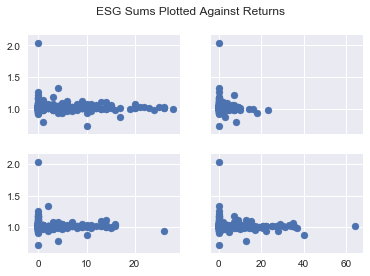

In [18]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle('ESG Sums Plotted Against Returns')
ax1.scatter(x=all_data['EMP-str-sum'], y=all_data['avg_quarterly_roi'])
ax2.scatter(x=all_data['EMP-con-sum'], y=all_data['avg_quarterly_roi'])
ax3.scatter(x=all_data['ENV-str-sum'], y=all_data['avg_quarterly_roi'])
ax4.scatter(x=all_data['ENV-con-sum'], y=all_data['avg_quarterly_roi'])

There are some pretty extreme cases in here (check out that one that shows an ROI around 2..quarterly!) I looked that one up. It has this weird time period where the stock price rises by 2500% a few quarters in a row. Let's strip out the highest and lowest 5 returns so our means don't have major outliers thrown in.

In [19]:
without_outliers = all_data.sort_values('avg_quarterly_roi', ascending=False).iloc[5:-5, :]
all_data = without_outliers

Before we continue, I'll note here: it's not always a good idea to remove the outliers from your dataset. Sometimes they contain important information that's important for your model. I have decided that's not the case here. I dug into those companies with astronomical quarterly means. Turns out it's usually because the data said they had 2400% quarter-over-quarter returns a few times in a row or something. So I individually looked up these companies. I did not find information on these companies having a massive return spike and making people rich. If the media talks too much about any individual topic relative to its importance in society, it's stocks. So I'm fully confident that if there really had been some market-reshaping moment here, someone would have reported on it. Rather, I think these numbers have to do with inconsistencies in the data related to mireporting, missing a stock split, or some kind of bookkeeping thing.

Plot again, without outliers:

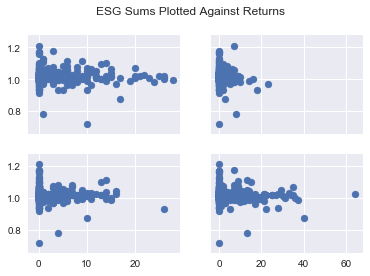

In [35]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle('ESG Sums Plotted Against Returns')
ax1.scatter(x=all_data['EMP-str-sum'], y=all_data['avg_quarterly_roi'])
ax2.scatter(x=all_data['EMP-con-sum'], y=all_data['avg_quarterly_roi'])
ax3.scatter(x=all_data['ENV-str-sum'], y=all_data['avg_quarterly_roi'])
ax4.scatter(x=all_data['ENV-con-sum'], y=all_data['avg_quarterly_roi'])

Let's look at the general trends of the returns. They look pretty flat to me: I don't see an upward or downward trend in quarterly ROI based on any of the 4 ESG metrics.

Let's dig a little deeper and see if the numbers themselves support that.

In [20]:
esg_sum_zero = all_data[all_data['EMP-str-sum'] == 0.0]
twenty_examples = esg_sum_zero.sample(20)

esg_sum_above_zero = all_data[all_data['EMP-str-sum'] > 0.0]

emp_str_sum = pd.concat([esg_sum_above_zero, twenty_examples])

The thing about a lot of our data is that it skews heavily toward one side or the other. For example, there are a lot more companies with low employment policy strength scores than high ones. How do we account for this when we do our aggregations? In the code below, I try to separate strata of ESG scores into buckets of similar size. That means a lot of the higher scores get bucketed together, while zero (0) or one(1) get their own buckets.

In [21]:
def buckets(score):
    if score == 0.0:
        val = '0' 
    if 0.0 < score < 2.0:
        val = '1' 
    if 1.0 < score < 4.0:
        val = '2-3' 
    if 3.0 < score < 6.0:
        val = '4-5' 
    if 5.0 < score < 8.0:
        val = '6-7'
    if 7.0 < score < 11.0:
        val = '8-10'
    if 10.0 < score:
        val = 'Above 11' 
    return val

emp_str_sum['emp_str_sum_grouping'] = emp_str_sum['EMP-str-sum'].apply(buckets)
emp_str_sum.head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,...,quarter_starting_12/31/2002_roi,quarter_starting_03/31/2003_roi,quarter_starting_06/30/2003_roi,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi,avg_quarterly_roi,emp_str_sum_grouping
154,CBS,3.0,0.0,0.0,7.0,"Biogen Idec, Inc.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.514986,1.137590,0.967115,1.088932,1.177156,2-3
387,GRN,1.0,0.0,0.0,0.0,Datapoint Corp,0.961538,0.809231,0.357414,1.595745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.128786,1
400,HBOC,1.0,0.0,0.0,0.0,eBay Inc.,NaN,NaN,NaN,NaN,...,1.257889,1.219083,0.515769,1.204512,1.072280,1.327223,0.999891,1.265390,1.127363,1
524,MDT,9.0,0.0,0.0,0.0,General Instrument Corp,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.117888,8-10
64,APD,6.0,0.0,14.0,13.0,Advanced Micro Devices,1.158629,1.040526,0.540000,0.951267,...,0.956656,1.037217,1.733229,1.341134,1.089262,0.979667,0.817610,1.693846,1.112761,6-7


And here are our initial results for employment policy strength scores and average quarterly ROIs!

In [22]:
grouping = emp_str_sum.groupby(['emp_str_sum_grouping']).agg({'avg_quarterly_roi': ['count','mean']}).reset_index()
grouping.sort_values('emp_str_sum_grouping')

emp_str_sum_grouping avg_quarterly_roi          
                                   count      mean
0                    0                 9  1.010742
1                    1                39  1.015095
2                  2-3                41  1.022955
3                  4-5                35  1.016831
4                  6-7                27  1.018502
5                 8-10                30  1.010588
6             Above 11                39  1.016971

My buckets are not perfectly the same sizes, but the means are not orders of magnitude apart. They're all in the 1.01-1.02 range, whether the company had a very high employment policy strength score or a sorry zero. 

We'll check for statistical significance in the next installment. In the meantime, though, our representation of these numbers happens to suppress differences. That's because we're looking at _quarterly_ ROI, which is a very short period of time for stock returns in which relatively little compounding will have taken place. It's more common for folks to evaluate and measure stocks on their _annual_ ROI. We can go back and find annual ROI means in our data, but honestly it's sort of a pain with the way this data is represented. So instead, we'll get an approximation by taking the quarterly ROI and raising it to the fourth power, since there are four quarters in a year.

In [23]:
emp_str = grouping['emp_str_sum_grouping']
qtrly_roi = grouping['avg_quarterly_roi']['mean']
emp_str_ann_roi = grouping['avg_quarterly_roi']['mean']**4
annual_view = pd.concat([emp_str, qtrly_roi, emp_str_ann_roi], axis=1).reset_index()
annual_view.columns = ['index','emp_str_sum_grouping', 'quarterly_mean_roi', 'extrapolated_annual_roi']
annual_view

,index,emp_str_sum_grouping,quarterly_mean_roi,extrapolated_annual_roi
0,0,0,1.010742,1.043664
1,1,1,1.015095,1.061760
2,2,2-3,1.022955,1.095032
3,3,4-5,1.016831,1.069041
4,4,6-7,1.018502,1.076085
5,5,8-10,1.010588,1.043027
6,6,Above 11,1.016971,1.069633


In [24]:
esg_sum_zero = all_data[all_data['EMP-con-sum'] == 0.0]
eighteen_examples = esg_sum_zero.sample(18)

esg_sum_above_zero = all_data[all_data['EMP-con-sum'] > 0.0]

emp_con_sum = pd.concat([esg_sum_above_zero, eighteen_examples])

def buckets(score):
    if score == 0.0:
        val = '0' 
    if 0.0 < score < 3.0:
        val = '1-2' 
    if 2.0 < score < 5.0:
        val = '3-4'
    if 4.0 < score:
        val = '5 and up'
    return val

emp_con_sum['emp_con_sum_grouping'] = emp_con_sum['EMP-con-sum'].apply(buckets)
emp_con_sum.head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,...,quarter_starting_12/31/2002_roi,quarter_starting_03/31/2003_roi,quarter_starting_06/30/2003_roi,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi,avg_quarterly_roi,emp_con_sum_grouping
104,BEV,0.0,7.0,0.0,0.0,Ascend Communications Inc.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.211995,5 and up
895,WMB,13.0,2.0,13.0,15.0,NetApp,NaN,NaN,NaN,NaN,...,1.119000,1.436997,1.276741,0.995616,1.053327,1.000000,1.070599,1.441215,1.098883,1-2
875,VZ,0.0,4.0,0.0,1.0,Nabisco Group Hldgs.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.082843,3-4
300,EP,3.0,4.0,3.0,9.0,3Com Corp.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.074835,3-4
23,ADSK,8.0,2.0,0.0,0.0,Adobe Systems Inc.,NaN,NaN,NaN,NaN,...,1.243145,1.040221,1.228251,0.992130,1.005629,1.183206,1.063871,1.268243,1.074382,1-2


In [25]:
grouping = emp_con_sum.groupby(['emp_con_sum_grouping'])[['avg_quarterly_roi']].agg(['count', 'mean']).reset_index()
grouping.sort_values('emp_con_sum_grouping')

emp_con_sum_grouping avg_quarterly_roi          
                                   count      mean
0                    0                 8  1.039686
1                  1-2                55  1.017798
2                  3-4                41  1.019816
3             5 and up                39  1.008384

In [26]:
emp_con = grouping['emp_con_sum_grouping']
qtrly_roi = grouping['avg_quarterly_roi']['mean']
emp_con_ann_roi = grouping['avg_quarterly_roi']['mean']**4
annual_view = pd.concat([emp_con, qtrly_roi, emp_con_ann_roi], axis=1).reset_index()
annual_view.columns = ['index','emp_con_sum_grouping', 'quarterly_mean_roi', 'extrapolated_annual_roi']
annual_view

,index,emp_con_sum_grouping,quarterly_mean_roi,extrapolated_annual_roi
0,0,0,1.039686,1.168448
1,1,1-2,1.017798,1.073116
2,2,3-4,1.019816,1.081651
3,3,5 and up,1.008384,1.033961


Especially uneven bucketing here, unfortunately. I could take a random sampling of the larger buckets. Maybe in the next round.

Anyway, this is employment concerns (scores for treating workers poorly).

In [27]:
esg_sum_zero = all_data[all_data['ENV-str-sum'] == 0.0]
twenty_examples = esg_sum_zero.sample(20)

esg_sum_above_zero = all_data[all_data['ENV-str-sum'] > 0.0]

env_str_sum = pd.concat([esg_sum_above_zero, twenty_examples])

def buckets(score):
    if score == 0.0:
        val = '0' 
    if 0.0 < score < 4.0:
        val = '1-3' 
    if 3.0 < score < 10.0:
        val = '4-9'
    if 9.0 < score:
        val = '9 and up'
    return val

env_str_sum['env_str_sum_grouping'] = env_str_sum['ENV-str-sum'].apply(buckets)
env_str_sum.head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,...,quarter_starting_12/31/2002_roi,quarter_starting_03/31/2003_roi,quarter_starting_06/30/2003_roi,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi,avg_quarterly_roi,env_str_sum_grouping
64,APD,6.0,0.0,14.0,13.0,Advanced Micro Devices,1.158629,1.040526,0.54,0.951267,...,0.956656,1.037217,1.733229,1.341134,1.089262,0.979667,0.817610,1.693846,1.112761,9 and up
895,WMB,13.0,2.0,13.0,15.0,NetApp,NaN,NaN,NaN,NaN,...,1.119000,1.436997,1.276741,0.995616,1.053327,1.000000,1.070599,1.441215,1.098883,9 and up
774,SRE,6.0,0.0,7.0,7.0,Moody's Corp,NaN,NaN,NaN,NaN,...,1.119642,1.140169,1.042876,1.101510,1.169282,0.913277,1.132849,1.185666,1.083947,4-9
190,CLX,5.0,0.0,4.0,0.0,Blockbuster Entertainment,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.083209,4-9
300,EP,3.0,4.0,3.0,9.0,3Com Corp.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.074835,1-3


In [28]:
grouping = env_str_sum.groupby(['env_str_sum_grouping'])[['avg_quarterly_roi']].agg(['count', 'mean']).reset_index()
grouping.sort_values('env_str_sum_grouping')

env_str_sum_grouping avg_quarterly_roi          
                                   count      mean
0                    0                10  1.033521
1                  1-3                41  1.010318
2                  4-9                44  1.016173
3             9 and up                23  1.014847

In [29]:
env_str = grouping['env_str_sum_grouping']
qtrly_roi = grouping['avg_quarterly_roi']['mean']
env_str_ann_roi = grouping['avg_quarterly_roi']['mean']**4
annual_view = pd.concat([env_str, qtrly_roi, env_str_ann_roi], axis=1).reset_index()
annual_view.columns = ['index','env_str_sum_grouping', 'quarterly_mean_roi', 'extrapolated_annual_roi']
annual_view

,index,env_str_sum_grouping,quarterly_mean_roi,extrapolated_annual_roi
0,0,0,1.033521,1.140978
1,1,1-3,1.010318,1.041915
2,2,4-9,1.016173,1.066279
3,3,9 and up,1.014847,1.060724


Here we have environmental impact strength. I could stratify these buckets more to get a more granular view. 

In [30]:
env_con_sum = all_data

def buckets(score):
    val = score
    if score == 0.0:
        val = '0' 
    if score == 1.0:
        val = '1' 
    if score == 2.0:
        val = '2' 
    if 2.0 < score < 5.0:
        val = '3-4'
    if 4.0 < score < 8.0:
        val = '5-7'
    if 7.0 < score < 13.0:
        val = '8-12'
    if 12.0 < score < 22.0:
        val = 'Above 12, below 21'
    if 21.0 < score:
        val = 'Above 21'
    return val

env_con_sum['env_con_sum_grouping'] = env_con_sum['ENV-con-sum'].apply(buckets)
env_con_sum.head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,...,quarter_starting_12/31/2002_roi,quarter_starting_03/31/2003_roi,quarter_starting_06/30/2003_roi,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi,avg_quarterly_roi,env_con_sum_grouping
104,BEV,0.0,7.0,0.0,0.0,Ascend Communications Inc.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.211995,0
154,CBS,3.0,0.0,0.0,7.0,"Biogen Idec, Inc.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.514986,1.137590,0.967115,1.088932,1.177156,5-7
112,NaN,NaN,NaN,NaN,NaN,Avaya Inc.,NaN,NaN,NaN,NaN,...,0.832653,3.166667,1.687307,1.187156,1.227202,0.994332,0.882837,1.233859,1.172312,NaN
854,USG,0.0,0.0,0.0,0.0,Navistar Int'l,1.064433,1.0,0.636804,0.855513,...,1.012341,1.325884,1.142507,1.284603,0.957402,0.845365,0.959494,1.182576,1.171694,0
823,TROW,0.0,0.0,0.0,0.0,Monsanto Co.,NaN,NaN,NaN,NaN,...,0.851948,1.319512,1.106285,1.202172,1.274149,1.049905,0.945974,1.525261,1.170466,0


In [31]:
grouping = env_con_sum.groupby(['env_con_sum_grouping'])[['avg_quarterly_roi']].agg(['count', 'mean']).reset_index()
grouping.sort_values('env_con_sum_grouping')

env_con_sum_grouping avg_quarterly_roi          
                                   count      mean
0                    0               251  1.020304
1                    1                17  1.021410
2                    2                12  1.022847
3                  3-4                22  1.013718
4                  5-7                27  1.020387
5                 8-12                22  1.022177
6   Above 12, below 21                26  1.006532
7             Above 21                19  1.003404

In [32]:
env_con = grouping['env_con_sum_grouping']
qtrly_roi = grouping['avg_quarterly_roi']['mean']
env_con_ann_roi = grouping['avg_quarterly_roi']['mean']**4
annual_view = pd.concat([env_con, qtrly_roi, env_con_ann_roi], axis=1).reset_index()
annual_view.columns = ['index','env_con_sum_grouping', 'quarterly_mean_roi', 'extrapolated_annual_roi']
annual_view

,index,env_con_sum_grouping,quarterly_mean_roi,extrapolated_annual_roi
0,0,0,1.020304,1.083721
1,1,1,1.021410,1.088431
2,2,2,1.022847,1.094566
3,3,3-4,1.013718,1.056012
4,4,5-7,1.020387,1.084076
5,5,8-12,1.022177,1.091704
6,6,"Above 12, below 21",1.006532,1.026384
7,7,Above 21,1.003404,1.013685


Finally, we have environmental concerns. In this one, the zero category is WAY bigger than the other categories. We could take a sample of this to alleviate that, if we wanted to. 

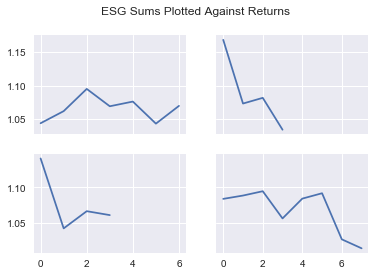

In [33]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle('ESG Sums Plotted Against Returns')
ax1.plot(emp_str_ann_roi)
ax2.plot(emp_con_ann_roi)
ax3.plot(env_str_ann_roi)
ax4.plot(env_con_ann_roi)

OK, so that's our initial data aggregation step. The plots above zoom into the differences from bucket to bucket. Next time, we'll analyze what this data might mean.

### Statistical Rigor

In [34]:
emp_str_ann_roi

0    1.043664
1    1.061760
2    1.095032
3    1.069041
4    1.076085
5    1.043027
6    1.069633
Name: mean, dtype: float64